<a href="https://colab.research.google.com/github/spe301/dsc-phase-4-project/blob/main/Twitter_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview


When Apple and other tech companies release products such as the IPhone and IPad, it is important for their product development teams are aware of the public opinion. Understanding the public opinion is valuable because it can help these companies understand what the public thinks of certain features of their products or their entire product as a whole. Smartphones are a great example of when general public understanding is valuable because they are bought by the general public rather than a niche market. Sentiment Analysis is a great way to apply Machine Learning to this situation. In Sentiment Analysis a computer is able to classify text such as a comment, tweet, or customer review as having a positive, negative, or neutral sentiment towards the topic the text has been written about. For this project I used a dataset of 9,000 tweets mostly about iphones, ipads, and google.




- Spencer Holley
- aacjpw@gmail.com
- https://github.com/spe301/dsc-phase-4-project


# Use cases for Twitter Sentiment Analysis


*  Assesing public opinions on a company's products  
*  Assesing public opinions on an event



# OBTAIN

Data is available directly from the repo.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/spe301/dsc-phase-4-project/main/data/judge-1377884607_tweet_product_company.csv',
                 engine='python',encoding='latin-1')

In [ ]:
#dropping row 6 as there's no tweet in that row and dropping all rows where sentiment is "I can't tell"
df = df.drop(6)
df = df.loc[df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]

# Scrubbing/Preprocessing

In [ ]:
#stripping punctuation
ix = list(df.index)
clean = []
for i in range(len(ix)):
  clean.append(df['tweet_text'][ix[i]].replace('.@', '').replace('.', '').replace('!', '').replace('@', '').replace('?', '').replace(':', '')
  .replace(',', '').replace(';', '').lower())

df['tweet'] = clean

## classes `DataHelper` and `DeepLearning`

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import models, layers
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from matplotlib import pyplot as plt
from math import log
from keras.regularizers import  L2, l1
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import  KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from xgboost import XGBClassifier, XGBRegressor
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import  confusion_matrix
import seaborn as sns

class MachineLearning:
    
    def CompareClassifiers(self, X, y):
        '''Compares the accuracy all sklearn classification algorithims'''
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        n = len(np.unique(y))
        if n == 2:
            methods = [KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(),
                      AdaBoostClassifier(), GradientBoostingClassifier(), XGBClassifier(), LogisticRegression(),
                      SVC()]
            strs = ['KNN', 'NB', 'DT', 'RF', 'AB', 'GB', 'XGB', 'Log', 'SVM']
        else:
            methods = [KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(),
                       AdaBoostClassifier(), GradientBoostingClassifier(), XGBClassifier(), SVC()]
            strs = ['KNN', 'DT', 'RF', 'AB', 'GB', 'XGB', 'SVM']
        train_acc = []
        test_acc = []
        for i in range(len(methods)):
            clf = methods[i].fit(X_train, y_train)
            train_acc.append(clf.score(X_train, y_train))
            test_acc.append(clf.score(X_test, y_test))
        c1 = pd.DataFrame(strs)
        c2 = pd.DataFrame(train_acc)
        c3 = pd.DataFrame(test_acc)
        results = pd.concat([c1, c2, c3], axis='columns')
        results.columns = ['Model', 'train_acc', 'test_acc']
        return results
    
    def CompareRegressors(self, X, y):
        '''Compares the accuracy all sklearn regression algorithims'''
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        n = len(np.unique(y))
        methods = [LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(),
                       AdaBoostRegressor(), GradientBoostingRegressor(), XGBRegressor(), SVR()]
        strs = ['Lin', 'KNN', 'DT', 'RF', 'AB', 'GB', 'XGB', 'SVM']
        train_acc = []
        test_acc = []
        for i in range(len(methods)):
            reg = methods[i].fit(X_train, y_train)
            train_acc.append(reg.score(X_train, y_train))
            test_acc.append(reg.score(X_test, y_test))
        c1 = pd.DataFrame(strs)
        c2 = pd.DataFrame(train_acc)
        c3 = pd.DataFrame(test_acc)
        results = pd.concat([c1, c2, c3], axis='columns')
        results.columns = ['Model', 'train_acc', 'test_acc']
        return results
    
    def Optimize(self, model, parameters, X, y, metric='accuracy'):
        '''wraps the GridSearchCV into a simple one liner, one line plus the parameter grid'''
        try:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
            return GridSearchCV(model, parameters, cv=5, scoring=metric, n_jobs=-1, verbose=2).fit(X_train, y_train).best_estimator_
        except:
            return GridSearchCV(model, parameters, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train).best_estimator_
        
    def PipeIt(self, scaler, model, X, y):
        '''simplified version of sklearn's pipeline function'''
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        pipe = Pipeline([('scaler', scaler), ('model', model)]).fit(X_train, y_train)
        return "Training: {}, Validation: {}".format(pipe.score(X_train, y_train), pipe.score(X_test, y_test))
   
class Evaluater:
    
    def ScoreModel(self, model, X, y):
        '''scores a sklearn model'''
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        algo = model.fit(X_train, y_train)
        return 'Training: {}, Validation: {}'.format(algo.score(X_train, y_train), algo.score(X_test, y_test))
    
    def BuildConfusion(self, fitted_model,  Xval, yval, cmap='plasma', normalize="true"):
        '''spits out a confusion matrix'''
        cm = plot_confusion_matrix(fitted_model, Xval, yval, cmap=cmap, normalize=normalize)
        return cm

    def BuildTree(self, tree):
        '''visulization for decision trees'''
        try:
            return plot_tree(tree)
        except:
            return 'Please pass a tree class'
    
    def GetCoefficients(self, model, X, y):
      '''returns a model's coefficients'''
      try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        model.fit(X_train, y_train)
        return 'coefficients: {}'.format(model.coef_)
      except:
        return 'Please pass LinearRegression, LogisticRegression, or an SVM with a linear kernel'
        
    def GetImportance(self, model, X, y):
      '''returns a feature importance graph given a model and dataset'''
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
      model.fit(X_train, y_train)
      try:
        FI = model.feature_importances_
        n_features = X_train.shape[1]
        plt.figure(figsize=(8,8))
        plt.barh(range(n_features), FI, align='center') 
        plt.yticks(np.arange(n_features), X_train.columns.values) 
        plt.xlabel('Feature importance')
        plt.ylabel('Feature')
      except:
          return 'Please pass an ensemble class'
        
    def AUC(self, model, Xval, yval):
      '''displays AUC to evaluate a classification model'''
      pred = model.predict(Xval)
      fpr, tpr, threshold = roc_curve(yval, pred)
      return auc(fpr, tpr)

    def BuildConfusionDL(model, X, y, normalize='true'):
      '''displays a confusion matrix to evaluate a deep learning classifier'''
      yhat = []
      yreal = y.argmax(axis=1)
      pred = model.predict(X)
      prediction = pred.argmax(axis=1)
      cm = confusion_matrix(yreal, prediction, normalize=normalize)
      plot = sns.heatmap(cm, annot=True);
      plot.set_ylabel('True')
      plot.set_xlabel('Predict')
      return plot

class DataHelper:

    def ScaleData(self, strategy, y_var, data):
        '''scales tabular data'''
        X = data.drop([y_var], axis='columns')
        if strategy == 'minmax':
            return MinMaxScaler().fit(X).transform(X)
        if strategy == 'standard':
            return StandardScaler().fit(X).transform(X)
        if strategy == 'mean':
            for col in X.columns:
                X[col] = (X[col] - min(X[col]))/ (max(X[col]) - min(X[col]))
            return X
        
    def HoldOut(self, data):
        '''seperates out 10% of a dataset as unseen testing data'''
        train, test = train_test_split(data, test_size=0.1)
        return train, test
    
    def MakeNewDF(self, X, y, k):
      '''removes all features that aren't of k best'''
      selector = SelectKBest(k=k).fit(X, y)
      mask = selector.get_support()
      selected = []
      for i in range(len(mask)):
        if mask[i] == True:
          selected.append(X.columns[i])
      df = pd.DataFrame(selector.transform(X))
      df.columns = selected
      return df
    
    def VifIt(self, X):
      '''calculates the VIF score of each feature in a dataset'''
      vif = pd.Series([variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])], index=X.columns)
      return vif

    def MulticlassOutput(self, df, col):
      '''output preprocessing'''
      enc = OneHotEncoder()
      y = np.array(df[col]).reshape(-1, 1)
      oh = enc.fit_transform(y).toarray()
      return oh


    def ModelReadyText1(self, df, Xcol, ycol, pad):
      '''converts tweets into tokenized sequences'''
      text = list(df[Xcol])
      t = Tokenizer()
      t.fit_on_texts(text)
      tokens = t.texts_to_sequences(text)
      tokens2 = pad_sequences(tokens, maxlen=pad)
      dh = DataHelper()
      y = dh.MulticlassOutput(df, ycol)
      return tokens2, y

    def ModelReadyText2(self, df, Xcol, ycol, num_words):
      '''converts tweets into one-hot-encoded vectors'''
      dh = DataHelper()
      text = list(df[Xcol])
      t = Tokenizer(num_words=num_words)
      t.fit_on_texts(text)
      oh = t.texts_to_matrix(text)
      y = dh.MulticlassOutput(df, ycol)
      return oh, y

    def ViewAccuracy(self, history, epochs):
      '''plots a model's accuracy throughout training'''
      plt.plot(range(epochs), history.history['accuracy'], label='train');
      plt.plot(range(epochs), history.history['val_accuracy'], label='val');
      plt.legend(loc='best')
      plt.xlabel('epochs')
      plt.ylabel('accuracy')
      return None


    def ViewLoss(self, history, epochs):
      '''plots a model's loss throughout training'''
      plt.plot(range(epochs), history.history['loss'], label='train');
      plt.plot(range(epochs), history.history['val_loss'], label='val');
      plt.legend(loc='best')
      plt.xlabel('epochs')
      plt.ylabel('loss')
      return None

class DeepLearning:

  def Powers(self, n):
    '''help the model building functions determine nlayers'''
    k = int(log(n, 2))
    return k

  def Sparsity(self, x):
    '''help the model building function know when to use 'sparse_categorical_crossentropy' as loss function'''
    df = pd.DataFrame(x[0])
    df.columns = ['val']
    df2 = df.loc[df['val'] == 0]
    return len(df)*0.9 <= len(df2)

  def FeedForward(self, nodes, activation, optimizer, dropout, regularizer, inp, nclasses):
    '''builds a simple neural net with only Dense Layers'''
    dl = DeepLearning()
    if nclasses > 16:
      pen = nclasses*2
    else:
      pen = 16
    if nclasses == 2:
      oa = 'sigmoid'
      loss = 'binary_crossentropy'
    else:
      oa = 'softmax'
      if dl.Sparsity(X) == False:
        loss = 'categorical_crossentropy'
      else:
        loss = 'sparse_categorical_crossentropy'
    model = models.Sequential()
    if regularizer == None:
      model.add(layers.Dense(nodes, activation=activation, input_shape=(inp,)))
    if regularizer == 'L1':
      model.add(layers.Dense(nodes, activation=activation, input_shape=(inp,), kernel_regularizer=l1(0.005)))
    if regularizer == 'L2':
      model.add(layers.Dense(nodes, activation=activation, input_shape=(inp,), kernel_regularizer=L2(0.005)))
    if dropout == True:
      model.add(layers.Dropout(0.5))
    p = dl.Powers(nodes)
    for i in range(p):
      nodes /= 2
      nodes = int(nodes)
      if nodes > 16:
        if nodes > nclasses:
          model.add(layers.Dense(nodes, activation=activation))
    model.add(layers.Dense(pen, activation=activation))
    model.add(layers.Dense(nclasses, activation=oa))
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

  def RNN(self, nodes, activation, optimizer, dropout, regularizer, method, stacking, inp, nclasses):
    '''builds a neural network with LSTM or GRU layer(s)'''
    dl = DeepLearning()
    if nclasses > 16:
      pen = nclasses*2
    else:
      pen = 16
    if nclasses == 2:
      oa = 'sigmoid'
      loss = 'binary_crossentropy'
    else:
      oa = 'softmax'
      if dl.Sparsity(X) == False:
        loss = 'categorical_crossentropy'
      else:
        loss = 'sparse_categorical_crossentropy'  
    model = models.Sequential()
    model.add(layers.Embedding(inp, nodes))
    if method == 'LSTM':
      if regularizer == None:
        model.add(layers.LSTM(nodes, activation=activation, return_sequences=stacking))
      if regularizer == 'L1':
        model.add(layers.LSTM(nodes, activation=activation, kernel_regularizer=l1(0.005), return_sequences=stacking))
      if regularizer == 'L2':
        model.add(layers.LSTM(nodes, activation=activation, kernel_regularizer=L2(0.005), return_sequences=stacking))
    if method == 'GRU':
      if regularizer == None:
        model.add(layers.GRU(nodes, activation=activation, return_sequences=stacking))
      if regularizer == 'L1':
        model.add(layers.GRU(nodes, activation=activation, kernel_regularizer=l1(0.005), return_sequences=stacking))
      if regularizer == 'L2':
        model.add(layers.GRU(nodes, activation=activation, kernel_regularizer=L2(0.005), return_sequences=stacking))
    if dropout == True:
      model.add(layers.Dropout(0.5))
    dl = DeepLearning()
    if stacking == True:
      nodes = nodes//2
      if method == 'LSTM':
        model.add(layers.LSTM(nodes, activation=activation))
      else:
        model.add(layers.GRU(nodes, activation=activation))
    p = dl.Powers(nodes)
    for i in range(p):
      nodes /= 2
      nodes = int(nodes)
      if nodes > 16:
        if nodes > nclasses:
          model.add(layers.Dense(nodes, activation=activation))
    model.add(layers.Dense(pen, activation=activation))
    model.add(layers.Dense(nclasses, activation=oa))
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

  def TestDL(self, params, func, task, X, y, X_val=None, y_val=None, batch_size=64, epochs=50):
    '''wraps the keras wrapper functions and GridSearchCV into a simple one liner, one line plus the parameter grid'''
    early_stopping = [EarlyStopping(patience=10), ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5')]
    if task == 'classification':
      k = KerasClassifier(func)
    if task == 'regression':
      k = KerasRegressor(func)
    grid = GridSearchCV(k, params, cv=3)
    if type(X_val) != np.ndarray:
      grid.fit(X, y, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    else:
      grid.fit(X, y, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), callbacks=early_stopping)
    return grid

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def BuildConfusionDL(model, X, y, normalize='true', cmap='plasma'):
  '''displays a confusion matrix to evaluate a deep learning classifier'''
  yhat = []
  yreal = y.argmax(axis=1)
  pred = model.predict(X)
  prediction = pred.argmax(axis=1)
  cm = confusion_matrix(yreal, prediction, normalize=normalize)
  plot = sns.heatmap(cm, annot=True, cmap=cmap);
  plot.set_ylabel('True')
  plot.set_xlabel('Predict')
  return plot

In [ ]:
dh = DataHelper()
dl = DeepLearning()
ml = MachineLearning()
ev = Evaluater()

X, y = dh.ModelReadyText1(df, 'tweet', 'is_there_an_emotion_directed_at_a_brand_or_product', pad=33)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# MODELING

## Bidirectional LSTM

In [ ]:
def Bidirectional(vocab, nodes, output, optimizer, metrics, activation):
  if output == 1:
    oa = 'linear'
    loss = 'mse'
  if output == 2:
    oa = 'sigmoid'
    loss = 'binary_crossentropy'
  else:
    oa = 'softmax'
    loss = 'categorical_crossentropy'
  model = models.Sequential()
  model.add(layers.Embedding(vocab, nodes)) 
  model.add(layers.Bidirectional(layers.LSTM(nodes))) 
  model.add(layers.Dense(nodes/2, activation=activation))
  model.add(layers.Dense(nodes/4, activation=activation))
  model.add(layers.Dense(output, activation=oa))
  model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
  return model

B = Bidirectional(12500, 64, 3, 'adam', ['accuracy'], 'relu')
early_stopping = [EarlyStopping(patience=10), ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5')]
B.summary()
history = B.fit(X_train, y_train, batch_size=64, epochs=50, callbacks=early_stopping, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          800000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 870,755
Trainable params: 870,755
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
101/101 [==============================] - 9s 27ms/step - loss: 0.9465 - accuracy: 0.5678 - val_loss: 0.8

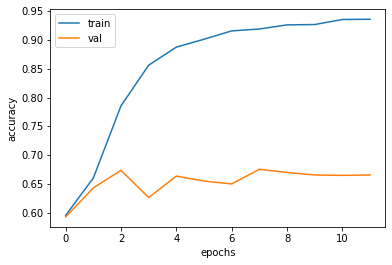

In [ ]:
dh.ViewAccuracy(history, 12)

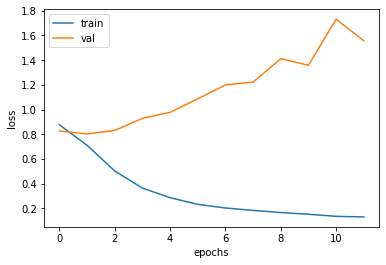

In [ ]:
dh.ViewLoss(history, 12)

There is a large gap in both accuracy and loss for training and validation sets. This is a sign of overfitting and the early minimal loss indicates possibility of being stuck in local minima.

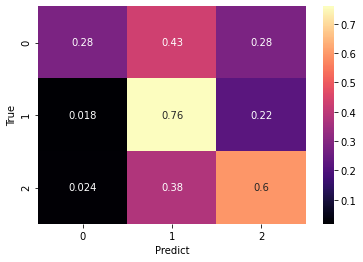

In [ ]:
BuildConfusionDL(B, X_test, y_test, cmap='magma')

### Bidirectional LSTM Gridsearch

In [ ]:
params = {'nodes': [50, 64, 128, 256], 'activation': ['relu', 'tanh'], 'optimizer': ['rmsprop', 'adam'], 'metrics': ['accuracy'], 'vocab': [12500], 'output': [3]}

X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size=0.2)
grid = dl.TestDL(params, Bidirectional, 'classification', X_train, y_train, X_val=X_val, y_val=y_val)

Epoch 1/50
84/84 [==============================] - 5s 22ms/step - loss: 0.8968 - accuracy: 0.5944 - val_loss: 0.7886 - val_accuracy: 0.6041
Epoch 2/50
84/84 [==============================] - 1s 14ms/step - loss: 0.7389 - accuracy: 0.6378 - val_loss: 0.7254 - val_accuracy: 0.6520
Epoch 3/50
84/84 [==============================] - 1s 14ms/step - loss: 0.6353 - accuracy: 0.7179 - val_loss: 0.6163 - val_accuracy: 0.7315
Epoch 4/50
84/84 [==============================] - 1s 14ms/step - loss: 0.5495 - accuracy: 0.7684 - val_loss: 0.5492 - val_accuracy: 0.7725
Epoch 5/50
84/84 [==============================] - 1s 14ms/step - loss: 0.4527 - accuracy: 0.8119 - val_loss: 0.5091 - val_accuracy: 0.7930
Epoch 6/50
84/84 [==============================] - 1s 13ms/step - loss: 0.3814 - accuracy: 0.8560 - val_loss: 0.4790 - val_accuracy: 0.8061
Epoch 7/50
84/84 [==============================] - 1s 14ms/step - loss: 0.3498 - accuracy: 0.8634 - val_loss: 0.4844 - val_accuracy: 0.8073
Epoch 8/50
84

In [ ]:
grid.best_estimator_.model.save('model.h5')

### Retraining Best Model from Gridsearch

In [ ]:
model = models.load_model('model.h5')

In [ ]:
model.evaluate(X_test, y_test, batch_size=64)

14/14 [==============================] - 1s 5ms/step - loss: 2.4165 - accuracy: 0.6566


[2.4164624214172363, 0.6565995812416077]

In [ ]:
model.evaluate(X_train, y_train, batch_size=64)

126/126 [==============================] - 1s 5ms/step - loss: 0.0343 - accuracy: 0.9856


[0.0342552550137043, 0.9855757355690002]

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
101/101 [==============================] - 3s 17ms/step - loss: 0.0367 - accuracy: 0.9849 - val_loss: 0.0318 - val_accuracy: 0.9894
Epoch 2/50
101/101 [==============================] - 2s 17ms/step - loss: 0.0303 - accuracy: 0.9868 - val_loss: 0.0370 - val_accuracy: 0.9869
Epoch 3/50
101/101 [==============================] - 2s 17ms/step - loss: 0.0278 - accuracy: 0.9874 - val_loss: 0.0462 - val_accuracy: 0.9851
Epoch 4/50
101/101 [==============================] - 2s 17ms/step - loss: 0.0272 - accuracy: 0.9887 - val_loss: 0.0533 - val_accuracy: 0.9807
Epoch 5/50
101/101 [==============================] - 2s 17ms/step - loss: 0.0245 - accuracy: 0.9891 - val_loss: 0.0439 - val_accuracy: 0.9845
Epoch 6/50
101/101 [==============================] - 2s 17ms/step - loss: 0.0232 - accuracy: 0.9894 - val_loss: 0.0560 - val_accuracy: 0.9826
Epoch 7/50
101/101 [==============================] - 2s 17ms/step - loss: 0.0210 - accuracy: 0.9902 - val_loss: 0.0536 - val_accuracy: 0.9782

It is important to keep in mind that these histories ar showing the results of a model that was already trained.

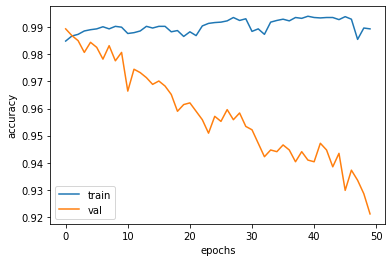

In [ ]:
dh.ViewAccuracy(history, 50)

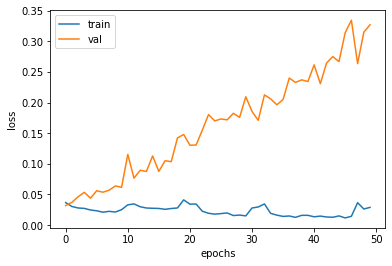

In [ ]:
dh.ViewLoss(history, 50)

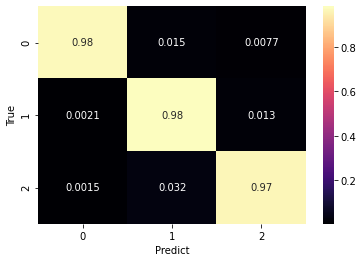

In [ ]:
BuildConfusionDL(model, X_train, y_train, cmap='magma')

## Dealing with Class Imbalance

I was planning on doing another gridsearch on my RNN building function to test out LSTM's and GRU's of varying sizes. However I'm going to do something about class imbalances first. Although I deleted these cells for some reason, I realized that the only way to stop the model from overfitting was to use l1 regularization. However, train and validation accuracy just stay around 60% which is interesting because ~60% of the data is of one class.

In [ ]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

### Using class_weights

I went back into my network building functions to parameritize metrics. if you look at the code it's already fixed but just note that accuracy was originally hardcoded as the metric for the models.

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

weights = compute_class_weight('balanced',
                                np.unique(df['is_there_an_emotion_directed_at_a_brand_or_product']),
                                df['is_there_an_emotion_directed_at_a_brand_or_product'])

weights_dict = dict(zip(range(3), weights))
weights_dict

{0: 5.2257309941520464, 1: 0.5528334570650829, 2: 1.0002238638907543}

In [ ]:
grid.best_params_

{'activation': 'tanh',
 'metrics': 'accuracy',
 'nodes': 128,
 'optimizer': 'rmsprop',
 'output': 3,
 'vocab': 12500}

In [ ]:
from keras.metrics import Recall, Precision

model2 = models.Sequential()
model2.add(layers.Embedding(12500, 128))
model2.add(layers.Bidirectional(layers.LSTM(128)))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(3, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=early_stopping, class_weight=weights_dict)

Epoch 1/50
101/101 [==============================] - 6s 31ms/step - loss: 1.0901 - accuracy: 0.3763 - val_loss: 0.8557 - val_accuracy: 0.5768
Epoch 2/50
101/101 [==============================] - 3s 26ms/step - loss: 0.8207 - accuracy: 0.5963 - val_loss: 0.8710 - val_accuracy: 0.5519
Epoch 3/50
101/101 [==============================] - 3s 26ms/step - loss: 0.5165 - accuracy: 0.7419 - val_loss: 1.0674 - val_accuracy: 0.5264
Epoch 4/50
101/101 [==============================] - 3s 26ms/step - loss: 0.3060 - accuracy: 0.8381 - val_loss: 1.0949 - val_accuracy: 0.5823
Epoch 5/50
101/101 [==============================] - 3s 26ms/step - loss: 0.2387 - accuracy: 0.8810 - val_loss: 1.0378 - val_accuracy: 0.5923
Epoch 6/50
101/101 [==============================] - 3s 26ms/step - loss: 0.1722 - accuracy: 0.9067 - val_loss: 1.0787 - val_accuracy: 0.6333
Epoch 7/50
101/101 [==============================] - 3s 26ms/step - loss: 0.1479 - accuracy: 0.9263 - val_loss: 1.0287 - val_accuracy: 0.6271

Interesting, The model actually did worse! Training and testing accuracies are vastly different which is a sign of overfitting

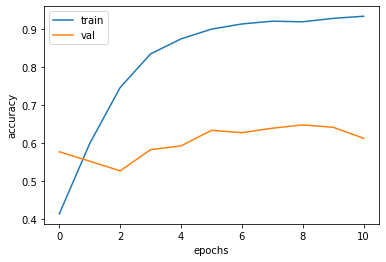

In [ ]:
dh.ViewAccuracy(history, 11)

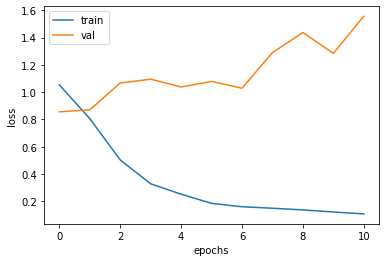

In [ ]:
dh.ViewLoss(history, 11)

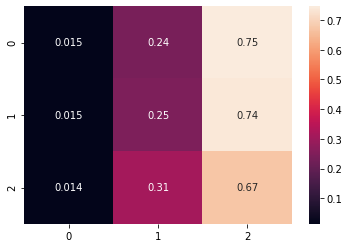

In [ ]:
BuildConfusionDL(model2, X_test, y_test)

I would do an exaustive gridsearch on my RNN building function to test out LSTM's and GRU's of varying parameters and sizes. however fixing class imbalances didn't help and I don't want to waste compute. I will instead use glove embeddings rather than creating my own embedding layer. I will also try a traditional machine learning approach later on.

In [ ]:
tokens = []
for num in ix:
  tokens.append(df['tweet'][num].split(' '))

In [ ]:
from gensim.models import Word2Vec, keyedvectors

W = Word2Vec(tokens, size=33, window=3, min_count=1, workers=4)
W.train(sentences=tokens, total_examples=W.corpus_count, epochs=10)
wv = W.wv

In [ ]:
e = W.wv.get_keras_embedding(train_embeddings=False)

In [ ]:
from keras.metrics import Recall #the model did better with accuracy in my experiance but feel free to try with recall or precision
from keras.metrics import  Precision

model3 = models.Sequential()
model3.add(e)
model3.add(layers.Bidirectional(layers.LSTM(128)))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(3, activation='softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = [EarlyStopping(patience=10), ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5')]

history = model3.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=early_stopping, class_weight=weights_dict)

Epoch 1/50
101/101 [==============================] - 4s 17ms/step - loss: 1.0700 - accuracy: 0.4574 - val_loss: 1.0391 - val_accuracy: 0.4462
Epoch 2/50
101/101 [==============================] - 1s 10ms/step - loss: 1.0466 - accuracy: 0.4412 - val_loss: 1.0213 - val_accuracy: 0.4792
Epoch 3/50
101/101 [==============================] - 1s 10ms/step - loss: 1.0439 - accuracy: 0.4244 - val_loss: 0.9904 - val_accuracy: 0.4823
Epoch 4/50
101/101 [==============================] - 1s 10ms/step - loss: 1.0042 - accuracy: 0.4441 - val_loss: 1.0287 - val_accuracy: 0.4363
Epoch 5/50
101/101 [==============================] - 1s 10ms/step - loss: 0.9863 - accuracy: 0.4535 - val_loss: 0.8852 - val_accuracy: 0.5469
Epoch 6/50
101/101 [==============================] - 1s 10ms/step - loss: 0.9708 - accuracy: 0.4926 - val_loss: 0.9453 - val_accuracy: 0.5047
Epoch 7/50
101/101 [==============================] - 1s 10ms/step - loss: 0.9138 - accuracy: 0.5089 - val_loss: 1.1151 - val_accuracy: 0.3971

This model was trained on the word embeddings created by Gensim rather than the one I made. The model preformed poorly but in it's defense it did start with a lower accuracy in the mid 30's.

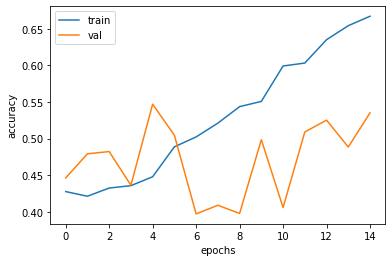

In [ ]:
dh.ViewAccuracy(history, 15)

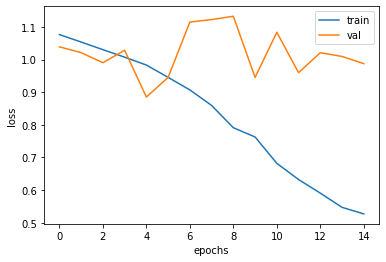

In [ ]:
dh.ViewLoss(history, 15)

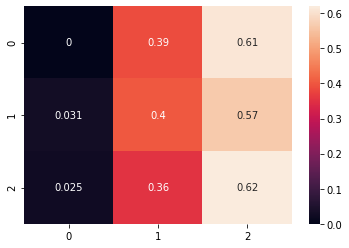

In [ ]:
BuildConfusionDL(model3, X_test, y_test)

In [ ]:
import nltk
nltk.download('stopwords')
stopwords_list = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# feel free to play around with the most_similar() method that returns words most or least similar to the selected word
# for most similar use 'positive=', for least similar use 'negative='
wv.most_similar(positive='google')

[('integrates', 0.8167288899421692),
 ("google's", 0.8088352084159851),
 ('socialflow', 0.7747348546981812),
 ('increase', 0.7565466165542603),
 ('#google', 0.7444072961807251),
 ('killers', 0.7395412921905518),
 ('crop', 0.7388477921485901),
 ('competing', 0.7381601333618164),
 ('possibility', 0.7344657182693481),
 ('reactions', 0.7315320372581482)]

Trying a different approach! I one hot encoded each tweet for all of the words in the corpus. I will use PCA to compress the very sparse data

In [ ]:
X_oh, y_oh = dh.ModelReadyText2(df, 'tweet', 'is_there_an_emotion_directed_at_a_brand_or_product', 12500)

In [ ]:
classes = []
for arr in y_oh:
  classes.append(arr.argmax())

In [ ]:
df2 = pd.DataFrame(X_oh)
df2['target'] = classes
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,12461,12462,12463,12464,12465,12466,12467,12468,12469,12470,12471,12472,12473,12474,12475,12476,12477,12478,12479,12480,12481,12482,12483,12484,12485,12486,12487,12488,12489,12490,12491,12492,12493,12494,12495,12496,12497,12498,12499,target
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8931,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8932,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8933,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8934,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=290)

X = df2.drop(['target'], axis='columns')

df3 = pd.DataFrame(pca.fit_transform(X))

In [ ]:
df3['target'] = classes

In [ ]:
X_train = dh.HoldOut(df3)[0].drop(['target'], axis='columns')
y_train = dh.HoldOut(df3)[0]['target']
X_test = dh.HoldOut(df3)[1].drop(['target'], axis='columns')
y_test = dh.HoldOut(df3)[1]['target']

In [ ]:
model4 = XGBClassifier()

model4.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
model4.score(X_test, y_test)

0.6017897091722595

In [ ]:
model4.score(X_train, y_train)

0.6349166873911962

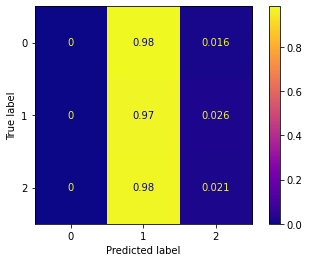

In [ ]:
ev.BuildConfusion(model4, X_test, y_test)

### Using SMOTE to resample

using Smote, synthetic minority oversampling, to fix class imbalance issues. As it lables everything as neutral.

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
xgb = XGBClassifier()
xgb.fit(X_res, y_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb.score(X_res, y_res)

0.7024396929824561

In [ ]:
xgb.score(np.array(X_test), np.array(y_test))

0.4373601789709172

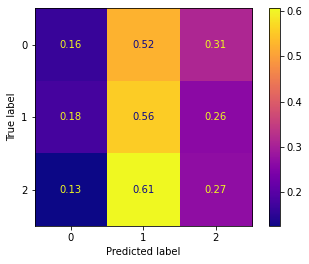

In [ ]:
ev.BuildConfusion(xgb, np.array(X_test), np.array(y_test))

After trying various RNN's and gradient boosted forests trained on word embeddings, and trained on a PCA transformed one hot encoded vectors. I've concluded that the RNN saved as 'bid.h5' was the best. Although it was overfit it got 94% accuracy. I will now access random tweets outside of the dataset via the twitter API and see how the model classifies the tweets

In [ ]:
from google.colab import files
path_to_file = list(files.upload().keys())[0]

Saving ssh-twitter.txt to ssh-twitter.txt


In [ ]:
import tweepy

c1 = open('ssh-twitter.txt').readlines()[2].split(':')[1].replace('\n', '').replace(' ', '')
c2 = open('ssh-twitter.txt').readlines()[3].split(':')[1].replace('\n', '').replace(' ', '')
a1 = open('ssh-twitter.txt').readlines()[0].split(':')[1].replace('\n', '').replace(' ', '')
a2 = open('ssh-twitter.txt').readlines()[1].split(':')[1].replace('\n', '').replace(' ', '')

auth = tweepy.OAuthHandler(c1, c2)
auth.set_access_token(a1, a2)

def GetTweets(Topic):
  api = tweepy.API(auth)
  topic = api.search(Topic)
  tweets = []
  time = []
  for i in range(len(topic)):
    tweets.append(topic[i]._json['text'].replace('\n', '').replace('.@', '').replace('.', '').replace('!', '').replace('@', '')
    .replace('?', '').replace(':', '').replace(',', '').replace(';', '').lower())
    time.append(topic[i]._json['created_at'])
    res = pd.DataFrame(tweets)
  res.columns = ['text']
  res['time'] = time 
  X = dh.ModelReadyText1(res, 'text', 'time', 33)[0]
  backup_dim = len(X), len(res)
  sent = []
  for arr in X:
    sentiment = int(round(model.predict(arr).argmax()/len(arr)-1))
    if sentiment == 0:
      sent.append('Negative')
    if sentiment == 1:
      sent.append('Neutral')
    if sentiment == 2:
      sent.append('Positive')
  res['sentiment'] = sent 
  results = res.drop(['time'], axis='columns')
  return results

With this GetTweets function all you have to do is enter a topic and you'll get a dataframe with tweets selected by the tweepy module and the sentiment that the model predicts!

In [ ]:
GetTweets('google')

,text,sentiment
0,rt keuangannews_id menindak lanjuti enail goog...,Positive
1,rt pewpewpablet en estados unidos dos gemelas ...,Negative
2,rt twiceusofficial once🍭we have reached our do...,Positive
3,rt kpoppinph0920 💥please help rt❤line bt21 win...,Positive
4,rt freefireth free fire heroes x มูลนิธิกระจกเ...,Neutral
5,rt bpsms_ รีทวิต #แจก โฟโต้บุคเปล่า🔥[pre] #bla...,Neutral
6,rt twiceusofficial once🍭we have reached our do...,Positive
7,rt layzhangbr #sorteio | xingmis em parceria c...,Neutral
8,「38州のグループが、反競争的行為や契約に関与し、インターネット検索エンジン市場を独占したと...,Positive
9,rt _smromero hey folks just did a minor update...,Positive


In [ ]:
model.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_49 (Embedding)     (None, None, 128)         1600000   
_________________________________________________________________
bidirectional_49 (Bidirectio (None, 256)               263168    
_________________________________________________________________
dense_147 (Dense)            (None, 64)                16448     
_________________________________________________________________
dense_148 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_149 (Dense)            (None, 3)                 99        
Total params: 1,881,795
Trainable params: 1,881,795
Non-trainable params: 0
_________________________________________________________________


EDA Questions...
1. according to the model how do the sentiment percentage breakdowns for ipad and iphone compare?
2. what are the top 5 most common words for tweets of negative, positive, and neutral sentiment?
3. how long is the average tweet of each sentiment?
4. what are the most used hashtags throughout the dataset?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


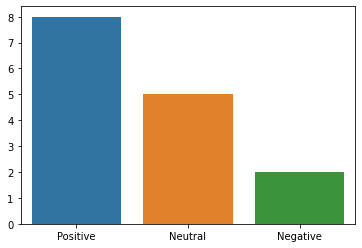

In [ ]:
import seaborn as sns

X = GetTweets('ipad')
y = ['Positive', 'Neutral', 'Negative']
pos = len(X.loc[X['sentiment'] == 'Positive'])
neu = len(X.loc[X['sentiment'] == 'Neutral'])
neg = len(X.loc[X['sentiment'] == 'Negative'])

sns.barplot(y, [pos, neu, neg]);
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


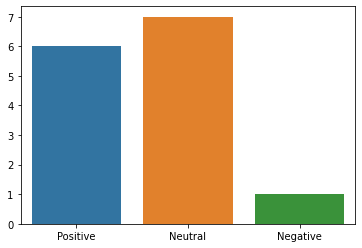

In [ ]:
X = GetTweets('iphone')
y = ['Positive', 'Neutral', 'Negative']
pos = len(X.loc[X['sentiment'] == 'Positive'])
neu = len(X.loc[X['sentiment'] == 'Neutral'])
neg = len(X.loc[X['sentiment'] == 'Negative'])

sns.barplot(y, [pos, neu, neg]);
plt.show()

Question 1: The iphone tweets were all labled as neutral or positive whereas some ipad tweets were labled as negative.

In [ ]:
def Top5(df, X, yvar, y, stopwords_list=stopwords_list):
  stopwords_list = stopwords_list + ['mention', 'link', 'it', '-', ':)', '', 'it']
  data = df.loc[df[yvar] == y]
  ix = list(data.index)
  corpus = []
  for num in ix:
    tweet = list(data[X][num].split(' '))
    corpus += tweet
  final = []
  for word in corpus:
    if not word in stopwords_list:
      Word = word.lower().replace('@', '').replace('{', '').replace('}', '').replace('.', '').replace('!', '').replace("'", "")
      if Word not in stopwords_list:
        final.append(Word)
  res = pd.Series(final)
  counts = pd.DataFrame(res.value_counts()[:5])
  counts.columns = ['num']
  count = []
  words = list(counts.index)
  for i in range(5):
    count.append(counts['num'][i])
  return sns.barplot(words, count, palette='plasma');

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


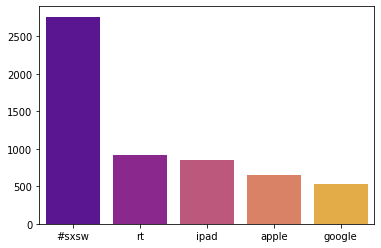

In [ ]:
Top5(df, 'tweet_text', 'is_there_an_emotion_directed_at_a_brand_or_product', 'Positive emotion')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


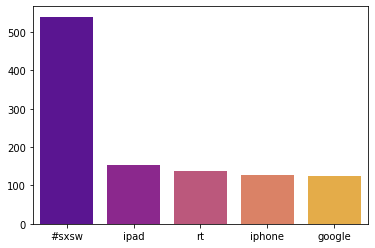

In [ ]:
Top5(df, 'tweet_text', 'is_there_an_emotion_directed_at_a_brand_or_product', 'Negative emotion')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


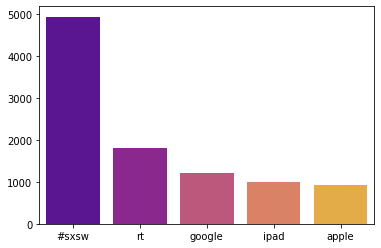

In [ ]:
Top5(df, 'tweet_text', 'is_there_an_emotion_directed_at_a_brand_or_product', 'No emotion toward brand or product')

Question 2: #sxsw was a very popular term throughout the dataset, among them google, apple, and ipad were very popular words.

In [ ]:
def GetLengths(df, X, yvar, y):
  data = df.loc[df[yvar] == y]
  lens = []
  ix = list(data.index)
  for num in ix:
    tweet = list(data[X][num].split(' '))
    lens.append(len(tweet))
  return int(np.mean(lens))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


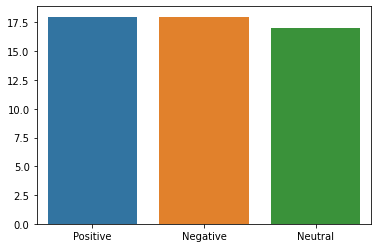

In [ ]:
pos = GetLengths(df, 'tweet_text', 'is_there_an_emotion_directed_at_a_brand_or_product', 'Positive emotion')
neg = GetLengths(df, 'tweet_text', 'is_there_an_emotion_directed_at_a_brand_or_product', 'Negative emotion')
neu = GetLengths(df, 'tweet_text', 'is_there_an_emotion_directed_at_a_brand_or_product', 'No emotion toward brand or product')
x = ['Positive', 'Negative', 'Neutral']
y = [pos, neg, neu]
sns.barplot(x, y);

Question3: The Tweets remain about 18-20 characters long regardless of sentiment.

In [ ]:
def Hashtags(df, X):
  tweets = []
  ix = list(df.index)
  for num in ix: 
    text = df[X][num].split(' ')
    tweets += text
  hashtags = []
  words = []
  for word in tweets:
    words.append(word.lower().replace('?', '').replace('.', '').replace(',', '').replace(':', '').replace('!', ''))
  for word in words:
    if word.startswith('#'):
      hashtags.append(word)
  ht = pd.Series(hashtags)
  counts = pd.DataFrame(ht.value_counts())
  counts.columns = ['num']
  return counts

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


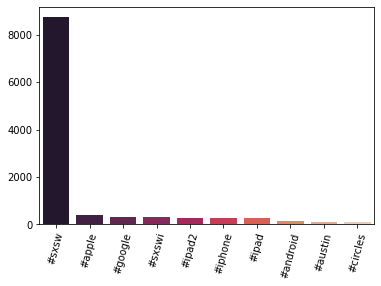

In [ ]:
import matplotlib.pyplot as plt

X = Hashtags(df, 'tweet_text')[:10]
x = list(X.index)
y = list(X['num'])
sns.barplot(x, y, palette='rocket');
plt.xticks(rotation=75)
plt.show()

'#sxsw' and it's variants; '#sxsw!', '#sxsw?', '#sxsw.', and '#sxsw:', was by far the most popular hashtag and it was used over 8,000 times throughout the dataset. most of the other hashtags refered to tech companies and tech products. '#austin' was also popular as the sxsw film festival is hosted in Austin, TX.

In [ ]:
GetTweets('Covid')

,text,sentiment
0,rt cctssab stephenking what about this for a s...,Neutral
1,rt brazilfight urgente-stf tem maioria contra ...,Neutral
2,rt danielriolo le nombre de gens à la télé qui...,Negative
3,rt honeybadger10 you get to snitch on covid pa...,Positive
4,if you missed kontrolenergy biocloud launch ch...,Neutral
5,rt drdavidsamadi i’m a doctor not a politician...,Positive
6,"colorado counties can apply to set up a new ""5...",Neutral
7,seruisatw pues covid-20,Positive
8,rt robdenbleyker you've heard of elf on a shel...,Negative
9,rt bobscartoons to be clear the 'risk' of you ...,Neutral


# Key Takeaways

* A Bidirectional LSTM was the highest preforming model
* The SXSW film festival in Austin, Texas is very poplular
* the majority of tweets are of neutral sentiment

## Model Training Reccomendations

1. using a grid search to test out various hyperparameter combinations.
2. experiment with the number of nodes in each layer 
3. for activation test between relu and tanh 
4. for optimization test between adam and rmsprop